In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading CSV

In [2]:
csv_url = 'https://andybek.com/pandas-drinks'

pd.read_csv(csv_url)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [3]:
pd.read_csv(csv_url, usecols=['country', 'wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [4]:
alcohol = pd.read_csv(csv_url, usecols=['country', 'wine_servings'], index_col='country').squeeze('columns').copy()
alcohol.head()


country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [5]:
type(alcohol)

pandas.core.series.Series

## Series Sizing With .size, .shape, and .len

In [6]:
alcohol.size, alcohol.shape, len(alcohol)

(193, (193,), 193)

In [7]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [8]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [9]:
alcohol.values.size == alcohol.index.size

True

In [10]:
alcohol.size == alcohol.shape[0]

True

## Unique Values Amd Series Monotonicity

In [11]:
alcohol.is_unique

False

In [12]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [13]:
alcohol.head().is_unique

True

In [14]:
alcohol.nunique(dropna=False)

72

In [15]:
# monotonicity

pd.Series([1, 2, 3]).is_monotonic_decreasing, pd.Series([1, 2, 3]).is_monotonic_increasing

(False, True)

In [16]:
pd.Series([5, 4, 6, 1]).is_monotonic_decreasing

False

In [17]:
pd.Series(reversed([1, 2, 3, 4, 5])).is_monotonic_decreasing

True

## The .count() Method

In [18]:
alcohol.count(), alcohol.size

(np.int64(162), 193)

In [19]:
alcohol.hasnans

True

## Accessing And Counting NA's

In [20]:
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [21]:
alcohol[alcohol.isnull()]

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [22]:
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [23]:
len(list(alcohol[alcohol.isnull()].index))

31

In [24]:
alcohol.isnull().sum()

np.int64(31)

In [25]:
nulls = alcohol.isnull().sum()
all = alcohol.size
nonnulls = alcohol.count()

all == (nonnulls + nulls)

np.True_

## Another Approach

In [26]:
import numpy as np

In [27]:
np.isnan

<ufunc 'isnan'>

In [28]:
ser = pd.Series(data=[True, False, None, 2], dtype=float)
np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [29]:
ser

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64

In [30]:
alcohol[np.isnan].size

31

## notnull And notna

In [31]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [32]:
alcohol.loc[alcohol.notnull()]

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [33]:
alcohol.notnull().sum()

np.int64(162)

In [34]:
alcohol.count()

np.int64(162)

In [35]:
alcohol.notnull().sum() + alcohol.isnull().sum() == alcohol.size

np.True_

## Booleans are literally numbers in python

In [36]:
True + 19

20

In [37]:
True + True * True - True + True

2

In [38]:
type(True), type(False)

(bool, bool)

In [39]:
bool.__mro__

(bool, int, object)

## Challenge

1. Isolate non-nulls in the *alcohol* series and assign them to the variable *wine_serving*

In [40]:
wine_servings = alcohol[alcohol.notna()]
wine_servings

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

2. What is the total wine consumed by countries in *wine_servings*

In [41]:
wine_servings.sum()

np.float64(8221.0)

3. In the *wine_servings* dataset, what was the total wine consumed by countries that consumed less than 100 servings?

In [42]:
wine_servings[lambda x: x < 100].sum()

np.float64(2416.0)

## Dropping And Filling NAs

In [43]:
alcohol.dropna(inplace=False)

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [44]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [45]:
alcohol.fillna(100, inplace=False)

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

## Descriptive Statistics

In [46]:
# Average

alcohol.sum() / alcohol.count()

np.float64(50.74691358024691)

In [47]:
alcohol.mean()

np.float64(50.74691358024691)

In [48]:
# Median

alcohol.median(), alcohol.quantile(.5)

(np.float64(11.5), np.float64(11.5))

<Axes: >

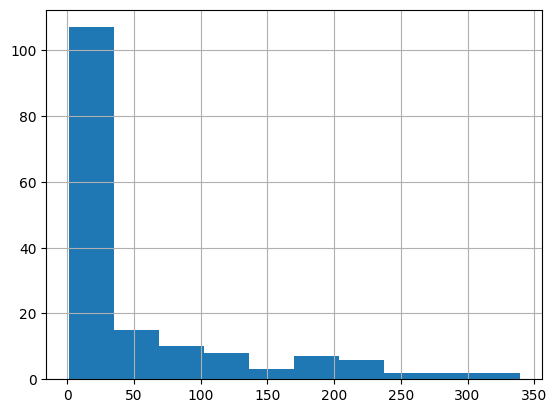

In [49]:
alcohol.hist()

In [50]:
# IQR

iqr = alcohol.quantile(.75) - alcohol.quantile(.25)
iqr

np.float64(58.25)

In [51]:
# Min and Max

alcohol.min(), alcohol.max()

(np.float64(1.0), np.float64(339.0))

In [52]:
# standard deviation

alcohol.std()

np.float64(76.13491716376171)

In [53]:
# Variance
alcohol.var()

np.float64(5796.5256115328575)

## Describe Methods

In [54]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [55]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [56]:
alcohol.describe(percentiles=[.79, .19])

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [57]:
alcohol.describe(percentiles=[.79, .19], include=float, exclude=object)


count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

## Mode and Value Count

In [58]:
# Mode

alcohol.mode()

0    1.0
Name: wine_servings, dtype: float64

In [59]:
alcohol[lambda x: x == 1]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [60]:
# Value Counts

alcohol.value_counts()

wine_servings
1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: count, Length: 71, dtype: int64

In [61]:
alcohol.value_counts().iloc[0]

np.int64(28)

In [62]:
alcohol.value_counts(normalize=True)

wine_servings
1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: proportion, Length: 71, dtype: float64

## Idxmax nad Idxmin

In [63]:
alcohol.max()

np.float64(339.0)

In [64]:
alcohol[lambda x: x == x.max()]

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [65]:
alcohol[lambda x: x == x.max()].index


Index(['Portugal'], dtype='object', name='country')

In [66]:
alcohol[lambda x: x == x.max()].index[0]

'Portugal'

In [67]:
alcohol.idxmax()

'Portugal'

In [68]:
alcohol.idxmin()

'Brunei'

In [69]:
alcohol.min()

np.float64(1.0)

In [70]:
alcohol[lambda x: x == x.min()]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [71]:
alcohol[lambda x: x.idxmax()], alcohol.max()

(np.float64(339.0), np.float64(339.0))

## Sorting With sort_values()

In [72]:
alcohol.sort_values()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [73]:
alcohol.sort_values(ascending=False)

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [74]:
alcohol.sort_values(ascending=True, na_position='last', kind='quicksort', inplace=True)

In [75]:
alcohol.head()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
Name: wine_servings, dtype: float64

## nlargest() and nsmallest()

In [76]:
alcohol.min(), alcohol.max()

(np.float64(1.0), np.float64(339.0))

In [77]:
alcohol.sort_values(ascending=False)[:10]

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [78]:
alcohol.nlargest(10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [79]:
alcohol.nsmallest(20)

country
Thailand                    1.0
Solomon Islands             1.0
Brunei                      1.0
Haiti                       1.0
Cambodia                    1.0
Guyana                      1.0
Canada                      1.0
Jordan                      1.0
Central African Republic    1.0
Comoros                     1.0
Ghana                       1.0
Gambia                      1.0
Fiji                        1.0
Egypt                       1.0
DR Congo                    1.0
Chad                        1.0
Kiribati                    1.0
Tanzania                    1.0
Philippines                 1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

## Sorting with sort_index()

In [80]:
alcohol.head()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
Name: wine_servings, dtype: float64

In [81]:
alcohol.sort_index(ascending=False, na_position='first', kind='quicksort', inplace=True)

In [82]:
alcohol.index.isnull().sum()

np.int64(0)

In [83]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

## Skill Challenge

1. Select all the countries from alcohol that have more than 50 *wine_servings* and save them in a variable *fifty_plus*

In [84]:
fifty_plus = alcohol[lambda x: x > 50]
fifty_plus.min()

np.float64(51.0)

2. From *fifty_plus* choose the countries with the smallest 20 wine servings values

In [85]:
# fifty_plus = fifty_plus.sort_values(ascending=True)[:20]
# fifty_plus

fifty_plus = fifty_plus.nsmallest(20)
fifty_plus

country
Seychelles             51.0
Bahamas                51.0
Albania                54.0
Poland                 56.0
Lithuania              56.0
Gabon                  59.0
Estonia                59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Paraguay               74.0
Cook Islands           74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

3. What is the mean, median, and std for the sample from step 2

In [86]:
fifty_plus.mean(), fifty_plus.median(), fifty_plus.std()

(np.float64(74.25), np.float64(73.5), np.float64(19.07292100831631))

## Arithmetics and fill_value()

In [87]:
alcohol + 2

country
Zimbabwe         6.0
Zambia           6.0
Yemen            NaN
Vietnam          3.0
Venezuela        5.0
               ...  
Angola          47.0
Andorra        314.0
Algeria         16.0
Albania         56.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [88]:
(alcohol - 10) * 2

country
Zimbabwe       -12.0
Zambia         -12.0
Yemen            NaN
Vietnam        -18.0
Venezuela      -14.0
               ...  
Angola          70.0
Andorra        604.0
Algeria          8.0
Albania         88.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [89]:
alcohol.head()


country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

In [90]:
alcohol.sort_index(inplace=True)

In [91]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [92]:
more_drinks = pd.Series({'Albania': 6, 'Alberia': 19, 'Algeria': 10, 'Afghanistan': 100, 'Yemen': 101})

In [93]:
alcohol + more_drinks

Afghanistan     NaN
Albania        60.0
Alberia         NaN
Algeria        24.0
Andorra         NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 194, dtype: float64

In [94]:
alcohol.add(more_drinks, fill_value=0)

Afghanistan    100.0
Albania         60.0
Alberia         19.0
Algeria         24.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [95]:
alcohol - more_drinks

Afghanistan     NaN
Albania        48.0
Alberia         NaN
Algeria         4.0
Andorra         NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 194, dtype: float64

In [96]:
alcohol.subtract(more_drinks, fill_value=0)

Afghanistan   -100.0
Albania         48.0
Alberia        -19.0
Algeria          4.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen         -101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [97]:
alcohol.divide(more_drinks, fill_value=1)

Afghanistan      0.010000
Albania          9.000000
Alberia          0.052632
Algeria          1.400000
Andorra        312.000000
                  ...    
Venezuela        3.000000
Vietnam          1.000000
Yemen            0.009901
Zambia           4.000000
Zimbabwe         4.000000
Length: 194, dtype: float64

In [98]:
alcohol.multiply(more_drinks, fill_value=1)

Afghanistan    100.0
Albania        324.0
Alberia         19.0
Algeria        140.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [99]:
more_drinks.head()

Albania          6
Alberia         19
Algeria         10
Afghanistan    100
Yemen          101
dtype: int64

In [100]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

## Calculating Variance And Standard Deviation

In [101]:
alcohol.var()

np.float64(5796.5256115328575)

In [102]:
(alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1)

np.float64(5796.5256115328575)

In [103]:
alcohol.std()

np.float64(76.13491716376171)

In [104]:
((alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1))**(1/2)


np.float64(76.13491716376171)

## Cumulative Operations

In [105]:
# sum

alcohol.sum()

np.float64(8221.0)

In [106]:
alcohol.cumsum(skipna=True)

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [107]:
np.nan + 123

nan

In [108]:
pd.NA + 123

<NA>

In [109]:
# Cumprod

alcohol.prod()

np.float64(3.4276115052182805e+183)

In [110]:
alcohol.cumprod().iloc[-1]

np.float64(3.4276115052182805e+183)

In [111]:
alcohol.prod() == alcohol.cumprod().iloc[-1]

np.True_

In [112]:
# Cumin Cumax

alcohol.min()

np.float64(1.0)

In [113]:
alcohol.cummin()

country
Afghanistan     NaN
Albania        54.0
Algeria        14.0
Andorra        14.0
Angola         14.0
               ... 
Venezuela       1.0
Vietnam         1.0
Yemen           NaN
Zambia          1.0
Zimbabwe        1.0
Name: wine_servings, Length: 193, dtype: float64

In [114]:
alcohol.max()

np.float64(339.0)

In [115]:
alcohol.cummax()

country
Afghanistan      NaN
Albania         54.0
Algeria         54.0
Andorra        312.0
Angola         312.0
               ...  
Venezuela      339.0
Vietnam        339.0
Yemen            NaN
Zambia         339.0
Zimbabwe       339.0
Name: wine_servings, Length: 193, dtype: float64

## Pairwise Differences With diff()

In [116]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [117]:
alcohol.diff().head()

country
Afghanistan      NaN
Albania          NaN
Algeria        -40.0
Andorra        298.0
Angola        -267.0
Name: wine_servings, dtype: float64

In [118]:
alcohol.diff(periods=2).head()

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        258.0
Angola          31.0
Name: wine_servings, dtype: float64

## Series Iteration

In [119]:
mini_alc = alcohol[:10]
mini_alc

country
Afghanistan            NaN
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [120]:
for i in mini_alc:
    print(i)

nan
54.0
14.0
312.0
45.0
45.0
221.0
11.0
212.0
191.0


In [121]:
for i in mini_alc.index:
    print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [122]:
for i in mini_alc.index:
    print(i, mini_alc.loc[i])

Afghanistan nan
Albania 54.0
Algeria 14.0
Andorra 312.0
Angola 45.0
Antigua & Barbuda 45.0
Argentina 221.0
Armenia 11.0
Australia 212.0
Austria 191.0


In [123]:
for i in mini_alc.items():
    print(i)

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


In [124]:
for i, j in mini_alc.items():
    print(i, j)

Afghanistan nan
Albania 54.0
Algeria 14.0
Andorra 312.0
Angola 45.0
Antigua & Barbuda 45.0
Argentina 221.0
Armenia 11.0
Australia 212.0
Austria 191.0


## Filtering

In [126]:
alcohol.filter(regex='^V')

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [127]:
alcohol.filter(like='stan')

country
Afghanistan      NaN
Kazakhstan      12.0
Kyrgyzstan       6.0
Pakistan         NaN
Tajikistan       NaN
Turkmenistan    32.0
Uzbekistan       8.0
Name: wine_servings, dtype: float64

In [128]:
alcohol[lambda x: x > 200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [129]:
alcohol.loc[lambda x: x > 200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [130]:
def gt200(x):
    return x > 200

alcohol.loc[gt200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [131]:
# Where method

alcohol.where(lambda x: x>200, other='too small')

country
Afghanistan    too small
Albania        too small
Algeria        too small
Andorra            312.0
Angola         too small
                 ...    
Venezuela      too small
Vietnam        too small
Yemen          too small
Zambia         too small
Zimbabwe       too small
Name: wine_servings, Length: 193, dtype: object

In [133]:
alcohol.where(lambda x: x<=200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

In [134]:
# mask method

alcohol.mask(lambda x: x>200).dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

## Transforming with update(), apply(), and map()

In [135]:
alcohol.head(10)

country
Afghanistan            NaN
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [136]:
# spot v global transforms

alcohol.loc['Algeria'] = 19
alcohol.loc['Algeria']

np.float64(19.0)

In [137]:
# Update method

alcohol.update(pd.Series(data=[200, 20, 202], index=['Albania', 'Algeria', 'Andorra']))
alcohol.head(10)

country
Afghanistan            NaN
Albania              200.0
Algeria               20.0
Andorra              202.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [138]:
# Apply method

alcohol.apply(lambda x: x**2)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        40804.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [139]:
alcohol.apply(np.square)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        40804.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [140]:
def multiply_by_self(x):
    return x*x

alcohol.apply(multiply_by_self)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        40804.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [141]:
def multiply_by_self_with_min(x, min_servings):
    if x < min_servings:
        return x**2
    
    return x

In [143]:
alcohol.apply(multiply_by_self_with_min, args=(200,))

country
Afghanistan       NaN
Albania         200.0
Algeria         400.0
Andorra         202.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [144]:
alcohol.head()

country
Afghanistan      NaN
Albania        200.0
Algeria         20.0
Andorra        202.0
Angola          45.0
Name: wine_servings, dtype: float64

In [145]:
alcohol.apply(multiply_by_self_with_min, min_servings=200)

country
Afghanistan       NaN
Albania         200.0
Algeria         400.0
Andorra         202.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

In [147]:
# Map method

alcohol.map(multiply_by_self)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        40804.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [148]:
alcohol

country
Afghanistan      NaN
Albania        200.0
Algeria         20.0
Andorra        202.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

## Challenge

1. Read drinks.csv, bring *beer_servings* into new series with country again acting as index. Assign this series to variable *beers*

In [154]:
beers = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'beer_servings'], index_col='country').squeeze().copy()
beers.head()

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
Name: beer_servings, dtype: float64

2. Calculate the mean, median, and standard deviation. Is the distribution right or left skewed?

In [155]:
beers.describe()

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

In [156]:
beers.mean(), beers.median(), beers.std()

(np.float64(102.87078651685393),
 np.float64(60.0),
 np.float64(100.6457126793478))

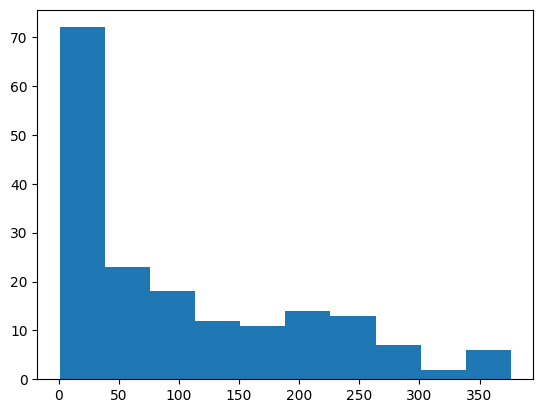

In [158]:
plt.hist(beers)
plt.show()

3. Slice the first 10 countries from beers. Are these relatively large or small relative to the rest of the sample?

In [160]:
beers_10 = beers.head(10)
beers_10.describe()


count      9.000000
mean     149.111111
std      111.438822
min       12.000000
25%       25.000000
50%      193.000000
75%      245.000000
max      279.000000
Name: beer_servings, dtype: float64

In [162]:
(beers_10 - beers.mean()).apply(lambda x: 'low' if x < 0 else 'high')

country
Afghanistan          high
Albania               low
Algeria               low
Andorra              high
Angola               high
Antigua & Barbuda     low
Argentina            high
Armenia               low
Australia            high
Austria              high
Name: beer_servings, dtype: object

In [163]:
(beers_10 - beers.mean()).apply(lambda x: 'low' if x < 0 else 'high').value_counts()

beer_servings
high    6
low     4
Name: count, dtype: int64

4. Create a new series that uses series arithmetics to calculate the z-score for each serving by subtracting from each the mean and dividing the difference by the std. 
Which country has the largest absolute z-score? Is this a positive or negative deviation?

In [166]:
z_scores = (beers - beers.mean()) / beers.std()
z_scores.head()

country
Afghanistan         NaN
Albania       -0.137818
Algeria       -0.773712
Andorra        1.412174
Angola         1.133970
Name: beer_servings, dtype: float64

In [167]:
z_scores.min(), z_scores.max()

(np.float64(-1.0121721413152407), np.float64(2.713768984410912))

In [168]:
z_scores.abs().max()

np.float64(2.713768984410912)

In [170]:
beers.idxmax()

'Namibia'

In [173]:
beers.loc[beers.idxmax()]

np.float64(376.0)

In [174]:
z_scores.abs().max() * beers.std() + beers.mean()

np.float64(376.0)